<a href="https://colab.research.google.com/github/Madhumitha1526/Customer-Lifetime-prediction/blob/main/Customer_lifetime_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 9.598445666057681e-26
R-squared: 1.0
     Actual  Predicted
109  303.40     303.40
10   159.38     159.38
184  133.48     133.48
77   223.44     223.44
538  128.85     128.85


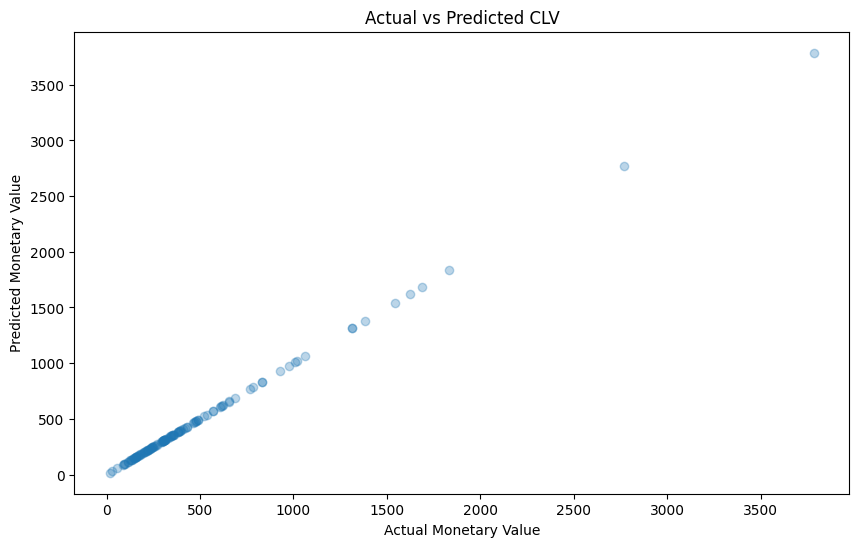

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
# Use encoding 'ISO-8859-1' to handle different character encodings
df = pd.read_csv('/content/customer_segmentation.csv', encoding='ISO-8859-1')

# Step 2: Data Preprocessing
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Drop rows with missing CustomerID
df.dropna(subset=['CustomerID'], inplace=True)

# Ensure Quantity and UnitPrice are positive
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Step 3: Feature Engineering
# Calculate Recency, Frequency, and Monetary value for each customer
snapshot_date = df['InvoiceDate'].max() + pd.DateOffset(1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                  # Frequency
    'TotalPrice': 'sum'                                      # Monetary Value
}).reset_index()

# Rename the columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Step 4: Model Building
# Prepare the features and target
X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Monetary']  # Assuming Monetary is the target for CLV

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Step 5: Evaluation
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Display first few predictions vs actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Monetary Value')
plt.ylabel('Predicted Monetary Value')
plt.title('Actual vs Predicted CLV')
plt.show()
